# Schematic figure
Generate a schematic figure to demonstrate a few ways how discounting may relate to BMI.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 16
#plt.rcParams.update({'font.size': 16})

np.random.seed(1234)

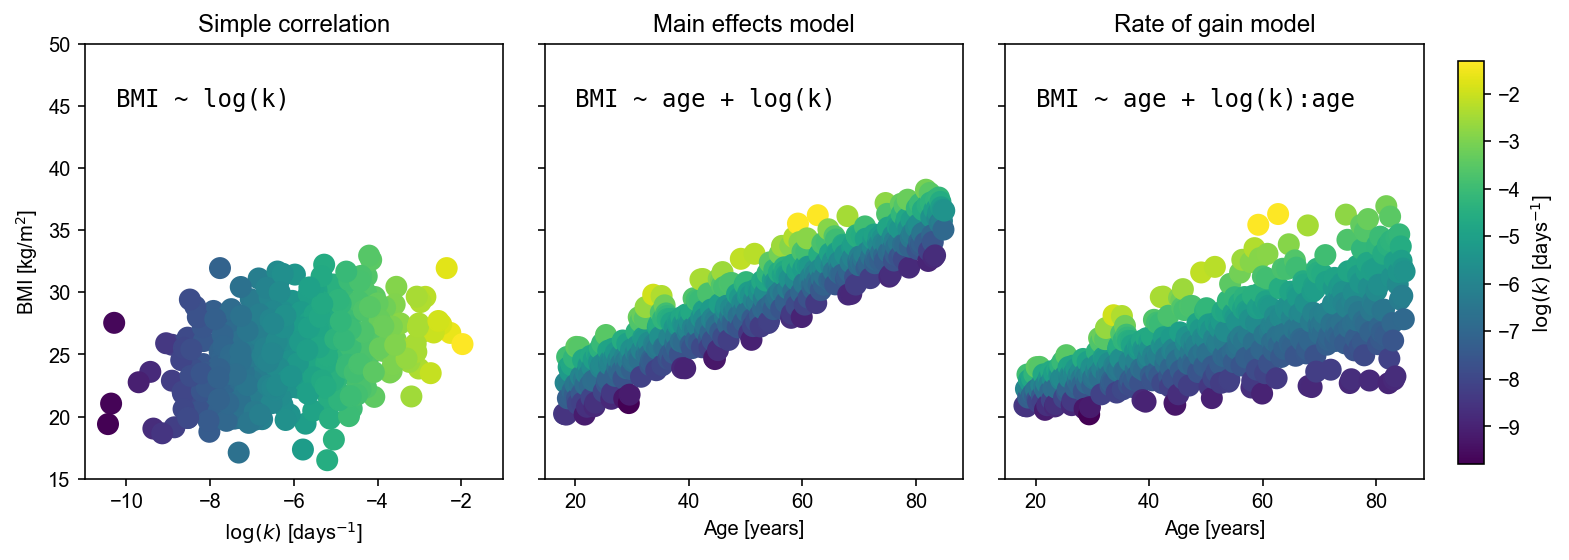

In [2]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# fig, (ax0, ax1, ax2, cax) = plt.subplots(ncols=4, figsize=(16, 4), sharey=True, 
#                                          gridspec_kw={"width_ratios":[1,1,1, 0.05]})

bmi_lim = [15, 50]
text_ypos = 45
cm = plt.cm.get_cmap('viridis')
N = 500
marker_size = 10**2

# correlation ----------------------------------------------------------------
logk_mu, logk_sd = -6, 1.5
bmi_mu, bmi_std = 25, 3
ρ = 0.4
diag = ρ * logk_sd * bmi_std

mu = [logk_mu, bmi_mu]
cov = [[logk_sd**2, diag], [diag, bmi_std**2]]

logk, bmi = np.random.multivariate_normal(mu, cov, N).T
#ax[0].scatter(logk, bmi)
ax[0].scatter(logk, bmi, c=logk, cmap=cm, s=marker_size)
# fig.colorbar(sc, ax=ax[0])
ax[0].set(xlabel='$\log(k)$ [days$^{-1}$]', ylabel='BMI [kg/m$^2$]', title='Simple correlation', 
          ylim=bmi_lim, 
          xlim=[-11, -1],
          xticks=np.linspace(-10,-2, 5))
ax[0].text(-10.25, text_ypos, 'BMI ~ log(k)', fontsize=12, usetex=False, family="monospace")

# age ----------------------------------------------------------------
age = np.linspace(18, 85, N)
logk = np.random.normal(logk_mu, logk_sd, N)
β0, β1, β3 = 25, 0.2, 1
bmi = β0 + β1 * age + β3 * logk

ax[1].scatter(age, bmi, c=logk, cmap=cm, s=marker_size)
ax[1].set(xlabel='Age [years]', title='Main effects model', ylim=bmi_lim)
# fig.colorbar(sc, ax=ax[1])
ax[1].text(20, text_ypos, r'BMI ~ age + log(k)', fontsize=12, usetex=False, family="monospace")


# moderation ----------------------------------------------------------------
age = np.linspace(18, 85, N)
#logk = np.random.normal(logk_mu, logk_sd, N)
β0, β1, β2 = 20, 0.3, 0.03
bmi = β0 + (β1 * age) + (β2 * age*logk)

sc = ax[2].scatter(age, bmi, c=logk, cmap=cm, s=marker_size)
# fig.colorbar(sc, ax=ax[2])

ax[2].set(xlabel='Age [years]', title='Rate of gain model', ylim=bmi_lim)
ax[2].text(20, text_ypos, r'BMI ~ age + log(k):age', fontsize=12, usetex=False, family="monospace")


# add in colorbar as extra floating axis --------------------

im = plt.gca().get_children()[0]
k=0.02
# left, bottom, width, height
cax = fig.add_axes([0.92,0.15,0.015,0.7]) 
fig.colorbar(im, cax=cax, label='$\log(k)$ [days$^{-1}$]')



# plt.show()

# figure level formatting ----------------------------------------------------------------
plt.subplots_adjust(wspace=0.1)

# save

plt.savefig('schematic.pdf', bbox_inches='tight')
plt.savefig('schematic.png', bbox_inches='tight', dpi=300)

Test

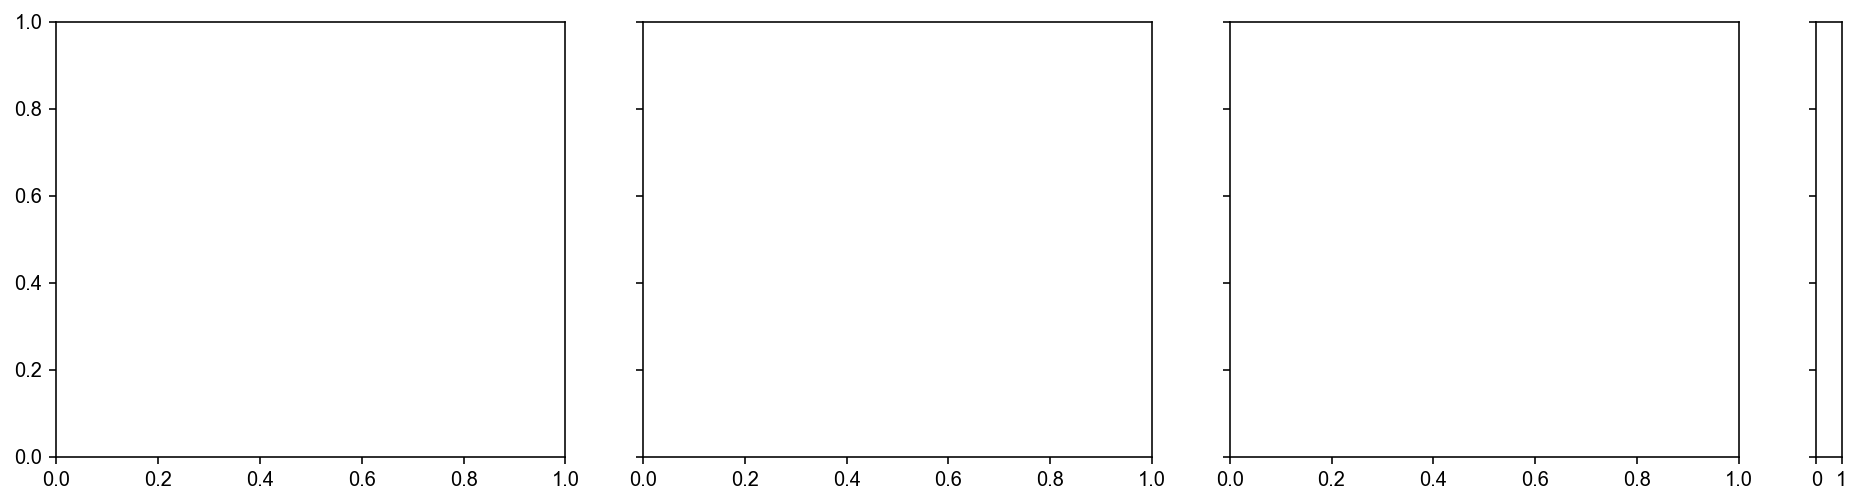

In [3]:
fig, (ax0, ax1, ax2, cax) = plt.subplots(ncols=4, figsize=(16, 4), sharey=True, 
                                         gridspec_kw={"width_ratios":[1,1,1, 0.05]})